# Solve the 2D linear lee wave problem using LeeWaveSolver

In [12]:
from solver import LeeWaveSolver
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr
import numpy as np

### First, we initialise the solver and set the flow conditions and topography:

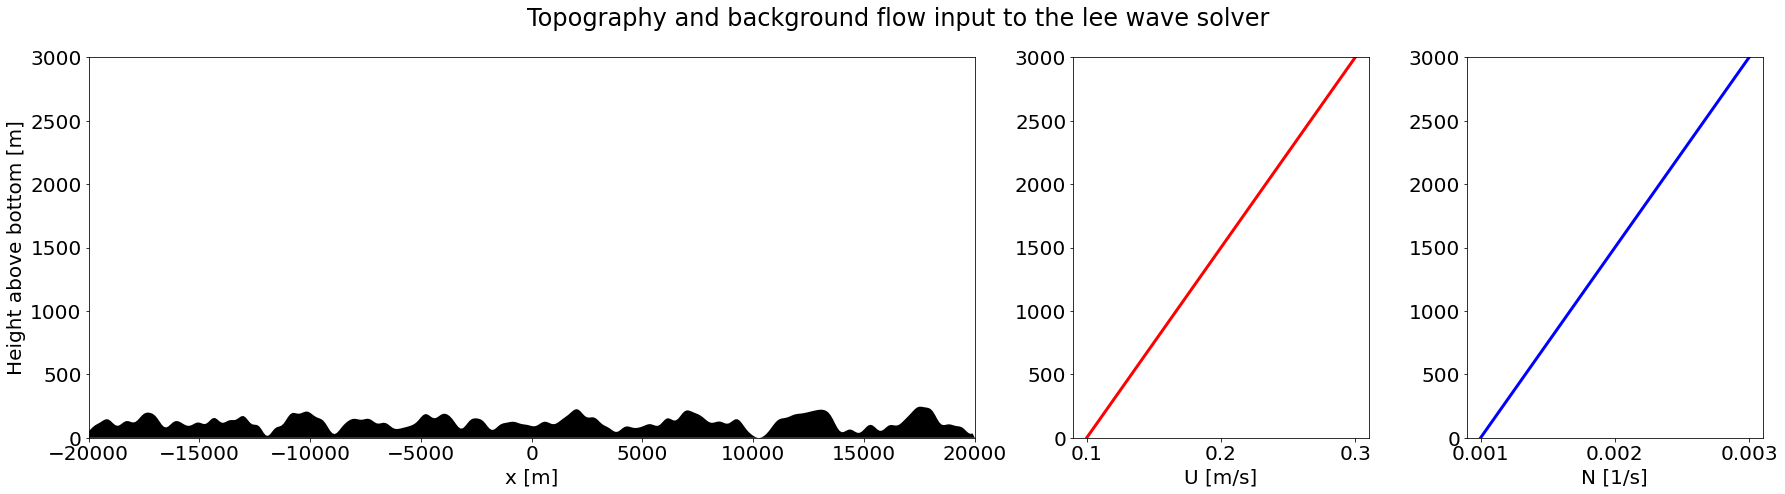

In [13]:
# Initialise the solver with some grid dimensions:
solver = LeeWaveSolver(nx=400, nz=401)

# Next, set the topography:
solver.set_topo(topo_type='GJ98')

# Set the background velocity profile:
solver.set_mean_velocity(U_type='Linear', U_0=0.1, U_H=0.3)

# Set the background stratification profile:
solver.set_mean_stratification(N_type='Linear', N_0=0.001, N_H=0.003)

# Visualize the inputs:
solver.plot_inputs()

### Now solve for the lee wave fields:

In [ ]:
# Solve the lee wave problem:
solver.solve(f=0, open_boundary=False, hydrostatic=False, Ah=1)

In [20]:
# Take a look at the output wave fields
solver.wave_fields

<xarray.Dataset>
Dimensions:     (k: 400, x: 400, z: 401)
Coordinates:
  * x           (x) float64 -2e+04 -1.99e+04 -1.98e+04 ... 1.98e+04 1.99e+04
  * k           (k) float64 -0.03142 -0.03126 -0.0311 ... 0.03094 0.0311 0.03126
  * z           (z) float64 0.0 7.5 15.0 22.5 ... 2.985e+03 2.992e+03 3e+03
Data variables: (12/17)
    psi         (x, z) float64 -7.559 -7.452 -7.307 ... 0.4243 0.2128 1.835e-13
    u           (x, z) float64 -0.01435 -0.01684 -0.02178 ... 0.02835 0.02844
    v           (x, z) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    w           (x, z) float64 0.01805 0.01851 0.01891 ... -0.0003133 -1.945e-16
    b           (x, z) float64 7.375e-05 7.3e-05 ... -6.343e-06 -5.485e-18
    p           (x, z) float64 1.929 2.191 2.711 3.224 ... -8.696 -8.779 -8.807
    ...          ...
    u_hat       (k, z) complex128 0j 0j 0j 0j 0j 0j 0j ... 0j 0j 0j 0j 0j 0j 0j
    v_hat       (k, z) complex128 0j 0j 0j 0j 0j 0j 0j ... 0j 0j 0j 0j 0j 0j 0j
    w_hat       (k, z) complex128 0j 0j 0j 0j 0j 0j 0j ... 0j 0j 0j 0j 0j 0j 0j
    b_hat       (k, z) complex128 0j 0j 0j 0j 0j 0j 0j ... 0j 0j 0j 0j 0j 0j 0j
    p_hat       (k, z) complex128 0j 0j 0j 0j 0j 0j 0j ... 0j 0j 0j 0j 0j 0j 0j
    h_topo_hat  (k) complex128 0j ... (2.0670600274580606e-11-2.0498856250934...
Attributes:
    description:  Lee wave solver output fields

In [21]:
# Take a look at the diagnostics
solver.diags

<xarray.Dataset>
Dimensions:         (x: 400, z: 401)
Coordinates:
  * x               (x) float64 -2e+04 -1.99e+04 -1.98e+04 ... 1.98e+04 1.99e+04
  * z               (z) float64 0.0 7.5 15.0 22.5 ... 2.985e+03 2.992e+03 3e+03
Data variables: (12/17)
    E_flux_1D       (z) float64 0.0302 0.03019 0.03011 ... 9.162e-05 8.608e-16
    E_kinetic_1D    (z) float64 0.6579 0.6738 0.7142 ... 1.318 1.338 1.345
    E_potential_1D  (z) float64 1.283 1.24 1.191 ... 0.02995 0.007528 7.198e-28
    E_1D            (z) float64 1.941 1.914 1.905 1.897 ... 1.348 1.346 1.345
    diss_rate_1D    (z) float64 1.441e-08 1.444e-08 ... 1.147e-08 1.152e-08
    mixing_1D       (z) float64 1.378e-08 1.336e-08 ... 6.449e-11 5.241e-36
    ...              ...
    E_kinetic_2D    (x, z) float64 0.2731 0.3216 0.4272 ... 0.4052 0.4129 0.4155
    E_potential_2D  (x, z) float64 2.793 2.71 2.601 ... 0.002303 1.716e-27
    E_2D            (x, z) float64 3.066 3.031 3.028 ... 0.4144 0.4152 0.4155
    diss_rate_2D    (x, z) float64 2.083e-09 1.623e-09 ... 3.465e-09 3.474e-09
    mixing_2D       (x, z) float64 3.712e-08 3.83e-08 ... 1.873e-11 1.891e-36
    D_2D            (x, z) float64 3.92e-08 3.993e-08 ... 3.484e-09 3.474e-09
Attributes:
    description:  Lee wave solver diagnostics

### Make some plots with the inbuilt plotting function:

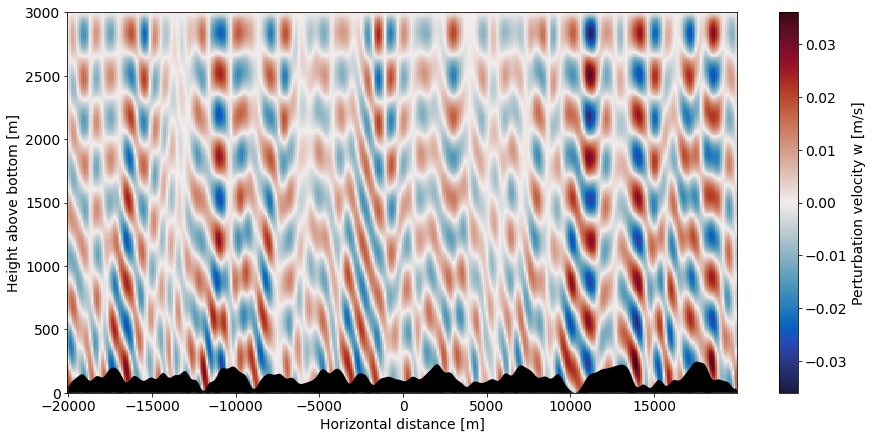

In [22]:
solver.plot(solver.wave_fields.w)

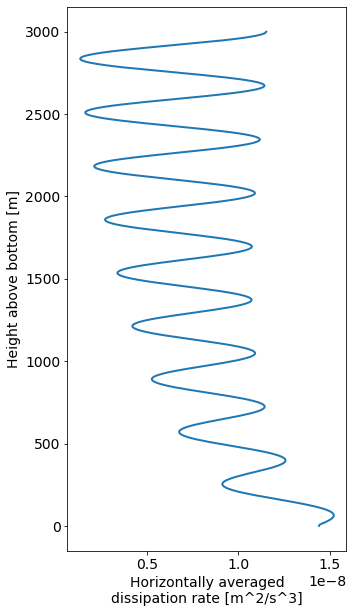

In [23]:
solver.plot(solver.diags.diss_rate_1D)